In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
import plotly.express as px
import plotly.graph_objects as go

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\imama\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
file_path = "speech.txt"
with open("dataset/speech.txt","r",encoding = "utf-8") as file:
    speech_text = file.read()

In [3]:
file_path

'speech.txt'

In [4]:
speech_text

'“I have come to express immense gratitude towards each and every citizen of India for repeatedly showing their trust in the government”\n\n“Many key legislations did not get the discussion they deserved as the opposition put politics above them”\n\n“This time period of the 21st century will impact the country for the next thousand years. We all should have a single focus”\n\n“We have given the youth of India a government free of scams”\n\n“Today a trust has arisen in the heart of the poor to fulfill his dreams”\n\n“Opposition is not able to see the trust of people as they are so steeped in distrust”\n\n“In 2028, when you will bring a No Confidence Motion, the Country will be among the top 3”\n\n“Opposition believes in changing names but they can’t change their work culture”\n\n“Freedom fighters and founding fathers of the country always opposed dynasty politics”\n\n“Crimes against women are unacceptable and the Central Government and the State Government will work to ensure that the g

In [5]:
speech_text_cleaned = re.sub(r'[^\w\s]','',speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words('english'))
word_filtered = [word for word in words if word not in stop_words]
word_filtered

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislations',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'years',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scams',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dreams',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'believes',
 'changing',
 'names',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighters',
 'founding',
 'fathers',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crimes',
 'women',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 '

In [6]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in word_filtered]
words_lemmatized

['come',
 'express',
 'immense',
 'gratitude',
 'towards',
 'every',
 'citizen',
 'india',
 'repeatedly',
 'showing',
 'trust',
 'government',
 'many',
 'key',
 'legislation',
 'get',
 'discussion',
 'deserved',
 'opposition',
 'put',
 'politics',
 'time',
 'period',
 '21st',
 'century',
 'impact',
 'country',
 'next',
 'thousand',
 'year',
 'single',
 'focus',
 'given',
 'youth',
 'india',
 'government',
 'free',
 'scam',
 'today',
 'trust',
 'arisen',
 'heart',
 'poor',
 'fulfill',
 'dream',
 'opposition',
 'able',
 'see',
 'trust',
 'people',
 'steeped',
 'distrust',
 '2028',
 'bring',
 'confidence',
 'motion',
 'country',
 'among',
 'top',
 '3',
 'opposition',
 'belief',
 'changing',
 'name',
 'cant',
 'change',
 'work',
 'culture',
 'freedom',
 'fighter',
 'founding',
 'father',
 'country',
 'always',
 'opposed',
 'dynasty',
 'politics',
 'crime',
 'woman',
 'unacceptable',
 'central',
 'government',
 'state',
 'government',
 'work',
 'ensure',
 'guilty',
 'punished',
 'peace',
 '

In [7]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)['compound'] for word in words_lemmatized]
sentiment_scores

[0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5106,
 -0.5719,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4767,
 0.4404,
 0.25,
 0.0,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 -0.4215,
 0.0,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6369,
 0.1531,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5423,
 0.0,
 -0.4588,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3818,
 -0.4215,
 -0.4588,
 0.5423,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0516,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4215,
 0.3818,
 0.0,
 0.0,
 0.4019,
 0.0,
 0.5106,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.296,
 0.0,
 0.0,
 0.0,
 0.0,


In [8]:
average_score = sum(sentiment_scores)/len(sentiment_scores) # nuetral sentiment
average_score

0.014298377028714108

In [9]:
positive_words= [word for i,word in enumerate(word_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i,word in enumerate(word_filtered) if sentiment_scores[i] < -0.1]
nuetral_words = [word for i,word in enumerate(word_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [10]:
print(f"positive words : {positive_words}")

positive words : ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'assurances

In [11]:
print(f"negative_words : {negative_words}")

negative_words : ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [12]:
print(f"nuetral_words : {nuetral_words}")

nuetral_words : ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'cant', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first', 'priorit

In [13]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_nuetral = nltk.FreqDist(nuetral_words)

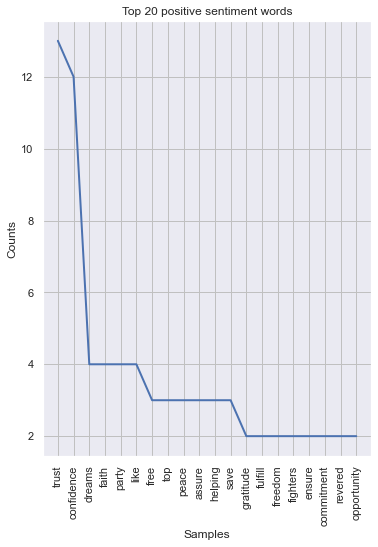

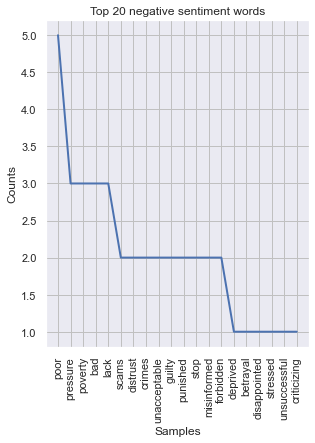

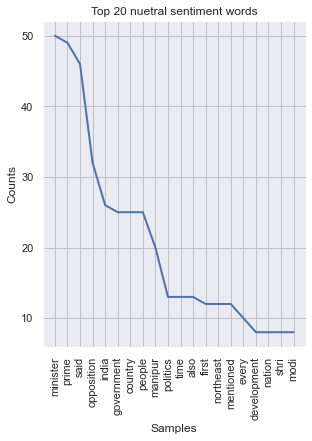

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(131)
word_freq_positive.plot(20,title = "Top 20 positive sentiment words")


plt.figure(figsize=(16,6))
plt.subplot(131)
word_freq_negative.plot(20,title = "Top 20 negative sentiment words")


plt.figure(figsize=(16,6))
plt.subplot(131)
word_freq_nuetral.plot(20,title = "Top 20 nuetral sentiment words")

plt.tight_layout()
plt.show()


In [15]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20),columns= ['pos_word','frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20),columns= ['neg_word','frequency'])
df_nuetral = pd.DataFrame(word_freq_nuetral.most_common(20),columns= ['nuetral_word','frequency'])

In [16]:
df_positive

pos_word  frequency
0         trust         13
1    confidence         12
2        dreams          4
3         faith          4
4         party          4
5          like          4
6          free          3
7           top          3
8         peace          3
9        assure          3
10      helping          3
11         save          3
12    gratitude          2
13      fulfill          2
14      freedom          2
15     fighters          2
16       ensure          2
17   commitment          2
18      revered          2
19  opportunity          2

In [17]:
df_negative

neg_word  frequency
0           poor          5
1       pressure          3
2        poverty          3
3            bad          3
4           lack          3
5          scams          2
6       distrust          2
7         crimes          2
8   unacceptable          2
9         guilty          2
10      punished          2
11          stop          2
12   misinformed          2
13     forbidden          2
14      deprived          1
15      betrayal          1
16  disappointed          1
17      stressed          1
18  unsuccessful          1
19   criticizing          1

In [18]:
fig_positive = px.bar(df_positive,x='pos_word',y='frequency',title = 'Top 20 positive words')
fig_negative = px.bar(df_negative,x='neg_word',y='frequency',title = 'Top 20 negative words')
fig_nuetral = px.bar(df_nuetral,x='nuetral_word',y='frequency',title = 'Top 20 nuetral words')

In [19]:
fig_positive.show()
fig_negative.show()
fig_nuetral.show()

In [20]:
wordcloud_positive = WordCloud(width = 800,height = 400,background_color= 'white').generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width = 800,height = 400,background_color= 'black').generate_from_frequencies(word_freq_negative)
wordcloud_nuetral = WordCloud(width = 800,height = 400,background_color= 'white').generate_from_frequencies(word_freq_nuetral)

Text(0.5, 1.0, 'Positive Sentiment Words')

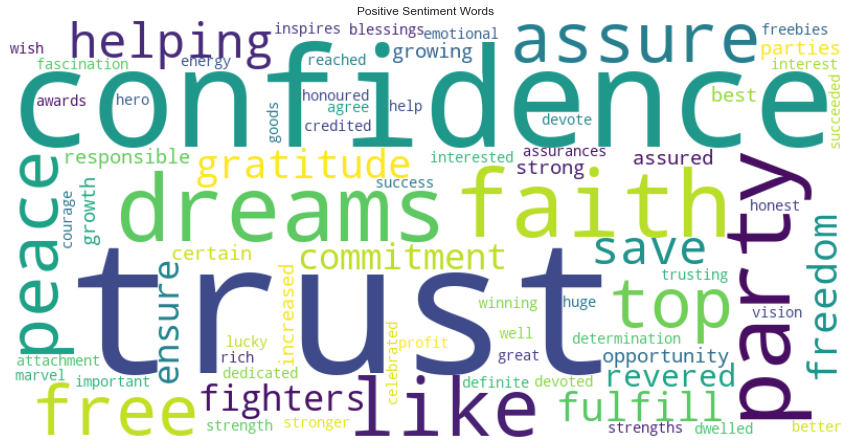

In [21]:
plt.figure(figsize = (15,10))


plt.imshow(wordcloud_positive,interpolation = 'bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")



Text(0.5, 1.0, 'Negative Sentiment Words')

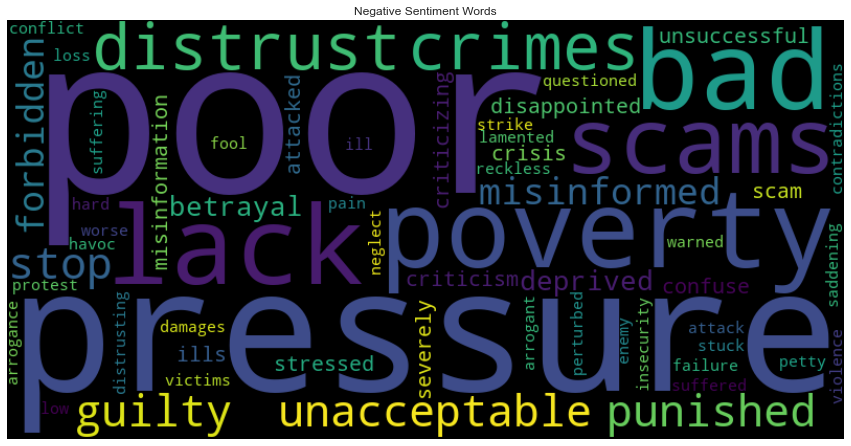

In [22]:
plt.figure(figsize = (15,10))


plt.imshow(wordcloud_negative,interpolation = 'bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")

Text(0.5, 1.0, 'Nuetral Sentiment Words')

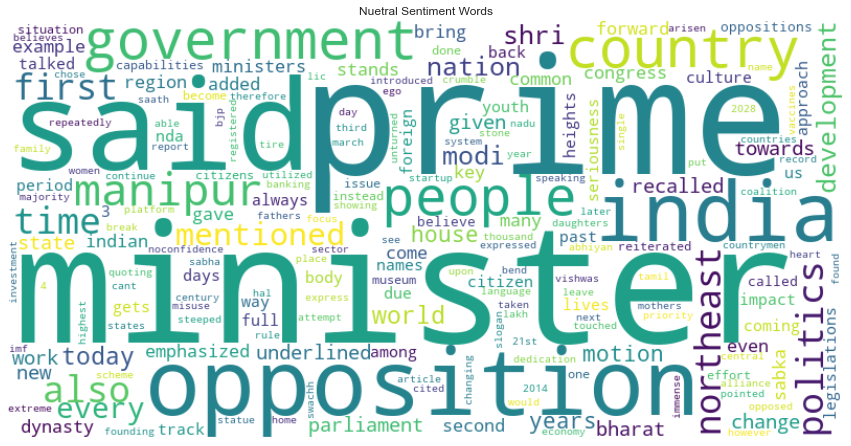

In [23]:
plt.figure(figsize = (15,10))


plt.imshow(wordcloud_nuetral,interpolation = 'bilinear')
plt.axis('off')
plt.title("Nuetral Sentiment Words")